# Fitur Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
file_path_main = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Dataset/data_FP/CFeaturesEngineering_Nm.csv'

# Muat dataset Anda
df_main = pd.read_csv(file_path_main)

In [34]:
# df_main.drop(columns=['Unnamed: 0'], inplace=True)

In [35]:
# df_main.to_csv('../Dataset/data_FP/CFeaturesEngineering_Nm.csv', index=False)

In [58]:
df_main.drop(columns=['id_industri', 'id_pekerjaan','id_perusahaan','judul_encoded','nama_perusahaan_encoded'], inplace=True)

In [59]:
# Ambil semua nama kolom
all_columns = df_main.columns.tolist()

# Hapus 'nama_industri_encoded' dari daftar nama kolom
selected_columns = [col for col in all_columns if col != 'nama_industri_encoded']

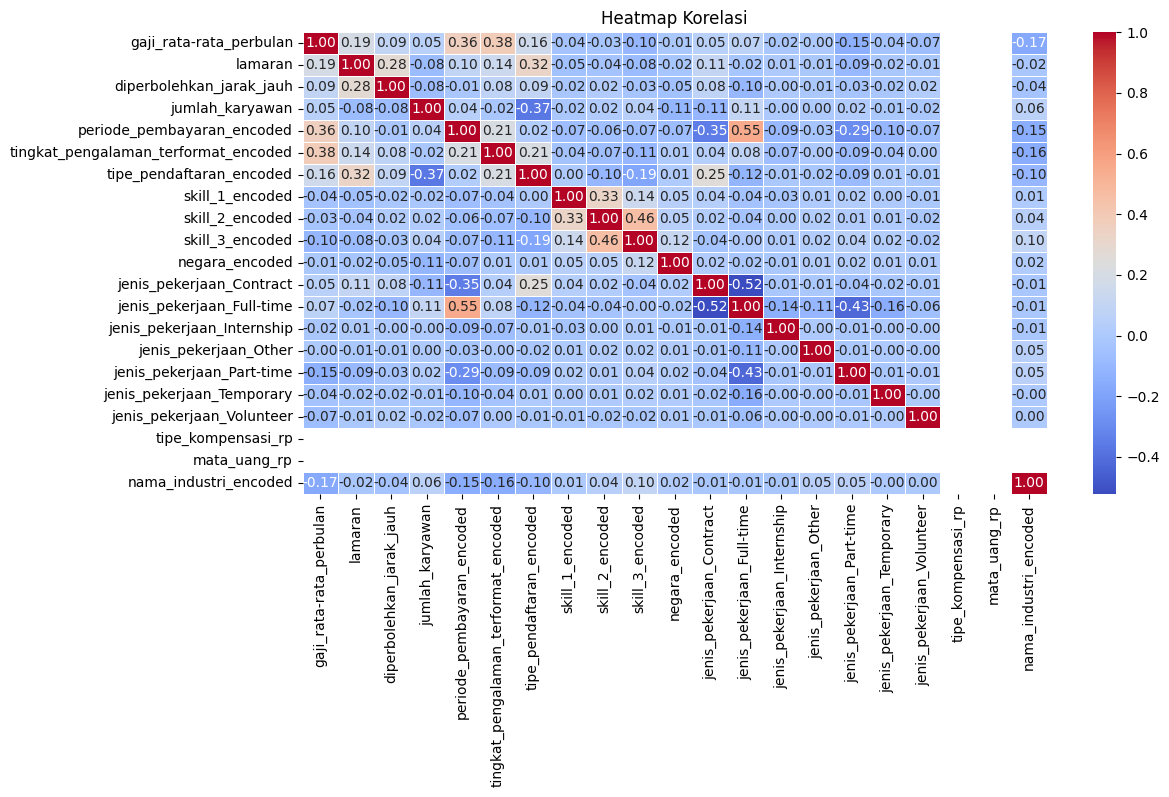

In [31]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_main.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [32]:
def calculate_abs_corr(df, features, target):
    abs_corr_dict = {}
    for feature in features:
        abs_corr_dict[feature] = abs(df[feature].corr(df[target]))
    return abs_corr_dict
abs_corr_scores = calculate_abs_corr(df_main, selected_columns, 'nama_industri_encoded')

# Mengurutkan nilai absolut koefisien korelasi dari yang terbesar ke yang terkecil
sorted_abs_corr_scores = sorted(abs_corr_scores.items(), key=lambda x: x[1], reverse=True)

# Menampilkan hasil
for feature, abs_corr_score in sorted_abs_corr_scores:
    print(f"Nilai Absolut Korelasi untuk fitur '{feature}': {abs_corr_score}")

Nilai Absolut Korelasi untuk fitur 'gaji_rata-rata_perbulan': 0.1705317722762124
Nilai Absolut Korelasi untuk fitur 'tingkat_pengalaman_terformat_encoded': 0.15905816080317745
Nilai Absolut Korelasi untuk fitur 'periode_pembayaran_encoded': 0.1490189261696378
Nilai Absolut Korelasi untuk fitur 'tipe_pendaftaran_encoded': 0.10497585078193541
Nilai Absolut Korelasi untuk fitur 'skill_3_encoded': 0.09606315578610827
Nilai Absolut Korelasi untuk fitur 'jumlah_karyawan': 0.0630130572741719
Nilai Absolut Korelasi untuk fitur 'jenis_pekerjaan_Part-time': 0.053934514253817435
Nilai Absolut Korelasi untuk fitur 'jenis_pekerjaan_Other': 0.04591000128031854
Nilai Absolut Korelasi untuk fitur 'skill_2_encoded': 0.0440778185095289
Nilai Absolut Korelasi untuk fitur 'diperbolehkan_jarak_jauh': 0.03884959727811897
Nilai Absolut Korelasi untuk fitur 'lamaran': 0.01860740518038955
Nilai Absolut Korelasi untuk fitur 'negara_encoded': 0.017182768891445797
Nilai Absolut Korelasi untuk fitur 'jenis_pekerja

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [33]:
def calculate_iv(df, features, target):
    iv_dict = {}
    
    for feature in features:
        lst = []
        for val in df[feature].unique():
            good = df[(df[feature] == val) & (df[target] == 1)].count()[target]
            bad = df[(df[feature] == val) & (df[target] == 0)].count()[target]
            
            if good == 0 or bad == 0:
                iv = 0  # Hindari pembagian oleh nol
            else:
                iv = (good / df[target].sum() - bad / (len(df[target]) - df[target].sum())) * np.log(good / df[target].sum() / (bad / (len(df[target]) - df[target].sum())))
            
            lst.append({
                'Value': val,
                'All': df[df[feature] == val].count()[target],
                'Good': good,
                'Bad': bad,
                'Distribusi Good': good / df[target].sum(),
                'Distribusi Bad': bad / (len(df[target]) - df[target].sum()),
                'IV': iv
            })

        data = pd.DataFrame(lst)
        iv_dict[feature] = data['IV'].sum()
    
    return iv_dict

# Hitung IV untuk fitur-fitur terpilih
iv_scores = calculate_iv(df_main, selected_columns, 'nama_industri_encoded')

# Tampilkan hasil
for feature, iv_score in iv_scores.items():
    print(f"Informasi Value (IV) untuk fitur '{feature}': {iv_score}")

Informasi Value (IV) untuk fitur 'gaji_rata-rata_perbulan': 0
Informasi Value (IV) untuk fitur 'lamaran': 0
Informasi Value (IV) untuk fitur 'diperbolehkan_jarak_jauh': 0
Informasi Value (IV) untuk fitur 'jumlah_karyawan': 0
Informasi Value (IV) untuk fitur 'periode_pembayaran_encoded': 0
Informasi Value (IV) untuk fitur 'tingkat_pengalaman_terformat_encoded': 0
Informasi Value (IV) untuk fitur 'tipe_pendaftaran_encoded': 0
Informasi Value (IV) untuk fitur 'skill_1_encoded': 0
Informasi Value (IV) untuk fitur 'skill_2_encoded': 0
Informasi Value (IV) untuk fitur 'skill_3_encoded': 0
Informasi Value (IV) untuk fitur 'negara_encoded': 0
Informasi Value (IV) untuk fitur 'jenis_pekerjaan_Contract': 0
Informasi Value (IV) untuk fitur 'jenis_pekerjaan_Full-time': 0
Informasi Value (IV) untuk fitur 'jenis_pekerjaan_Internship': 0
Informasi Value (IV) untuk fitur 'jenis_pekerjaan_Other': 0
Informasi Value (IV) untuk fitur 'jenis_pekerjaan_Part-time': 0
Informasi Value (IV) untuk fitur 'jenis_p

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df_main[selected_columns]
y = df_main['nama_industri_encoded']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Lihat feature importances dari Random Forest
print("Feature Importances dari Random Forest:")
for i, feature in enumerate(X.columns):
    print(f"Feature '{feature}': {rf.feature_importances_[i]}")

# Bangun model Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Lihat feature importances dari Decision Tree
print("\nFeature Importances dari Decision Tree:")
for i, feature in enumerate(X.columns):
    print(f"Feature '{feature}': {dt.feature_importances_[i]}")

Feature Importances dari Random Forest:
Feature 'gaji_rata-rata_perbulan': 0.308450917510208
Feature 'lamaran': 0.07901320800655283
Feature 'diperbolehkan_jarak_jauh': 0.017435316854279636
Feature 'jumlah_karyawan': 0.18729277966782376
Feature 'periode_pembayaran_encoded': 0.02415497548761645
Feature 'tingkat_pengalaman_terformat_encoded': 0.05181706144611475
Feature 'tipe_pendaftaran_encoded': 0.0297086140462347
Feature 'skill_1_encoded': 0.11153303165095851
Feature 'skill_2_encoded': 0.08812703616437755
Feature 'skill_3_encoded': 0.04436378687764306
Feature 'negara_encoded': 0.03370718757469095
Feature 'jenis_pekerjaan_Contract': 0.004724737513460181
Feature 'jenis_pekerjaan_Full-time': 0.01226420217077029
Feature 'jenis_pekerjaan_Internship': 0.0009112475480406435
Feature 'jenis_pekerjaan_Other': 0.0010480813585866504
Feature 'jenis_pekerjaan_Part-time': 0.0037423599249642803
Feature 'jenis_pekerjaan_Temporary': 0.0014589287447565559
Feature 'jenis_pekerjaan_Volunteer': 0.0002465274

# Coba

In [1]:
import pandas as pd

In [4]:
file_path_main = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Finpro/data_FP/data_FE/CFeaturesEngineering_Nm.csv'

# Muat dataset Anda
df_main = pd.read_csv(file_path_main)

In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39825 entries, 0 to 39824
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_pekerjaan                          39825 non-null  int64  
 1   id_perusahaan                         39825 non-null  int64  
 2   gaji_rata-rata_perbulan               39825 non-null  float64
 3   lamaran                               39825 non-null  int64  
 4   diperbolehkan_jarak_jauh              39825 non-null  bool   
 5   id_industri                           39825 non-null  int64  
 6   jumlah_karyawan                       39825 non-null  int64  
 7   periode_pembayaran_encoded            39825 non-null  int64  
 8   tingkat_pengalaman_terformat_encoded  39825 non-null  int64  
 9   tipe_pendaftaran_encoded              39825 non-null  int64  
 10  skill_1_encoded                       39825 non-null  int64  
 11  skill_2_encoded

In [25]:
# Lakukan one-hot encoding pada kolom 'nama_industri_encoded'
encoded = pd.get_dummies(df_main['nama_industri_encoded'], prefix='nama_industri_encoded')

# Gabungkan hasil encoding dengan DataFrame awal
df_combined = pd.concat([df_main['id_pekerjaan'], encoded], axis=1)

# Gabungkan baris-baris dengan 'id_pekerjaan' yang sama menggunakan metode max
df_groupby = df_combined.groupby('id_pekerjaan', as_index=False).max()

In [26]:
df_groupby

,id_pekerjaan,id_perusahaan,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,id_industri,jumlah_karyawan,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,...,nama_industri_encoded_66,nama_industri_encoded_67,nama_industri_encoded_68,nama_industri_encoded_69,nama_industri_encoded_70,nama_industri_encoded_71,nama_industri_encoded_72,nama_industri_encoded_73,nama_industri_encoded_74,nama_industri_encoded_75
0,102339515,52132271,5479.166667,0,False,91,7,5,4,2,...,False,False,False,False,False,False,False,False,False,False
1,108965123,0,4583.333333,2,False,19,0,5,4,3,...,False,False,False,False,False,False,False,False,False,False
2,120418612,52109750,5501.933245,0,True,91,7,5,4,2,...,False,False,False,False,False,False,False,False,False,False
3,133114754,77766802,5632.000000,0,False,92,15,5,2,3,...,False,False,False,False,True,False,False,False,False,False
4,218881389,0,8733.333333,1,False,52,0,5,4,3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32913,3757937095,437225,14791.666667,0,True,25,1260,5,4,1,...,True,False,False,False,False,False,False,False,False,False
32914,3757938018,18213359,3919.520000,0,False,100,36,2,2,1,...,False,False,False,False,False,False,False,False,False,False
32915,3757938019,474443,6776.000000,0,False,147,314,5,4,1,...,False,False,False,False,False,False,False,False,False,False
32916,3757940025,2192142,7085.416667,0,False,135,300,5,4,1,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Gabungkan dengan DataFrame awal menggunakan left join
df_result = df_main.merge(df_groupby, how='left', on='id_pekerjaan')

In [17]:
df_result

,id_pekerjaan,id_perusahaan,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,id_industri,jumlah_karyawan,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,...,nama_industri_encoded_66,nama_industri_encoded_67,nama_industri_encoded_68,nama_industri_encoded_69,nama_industri_encoded_70,nama_industri_encoded_71,nama_industri_encoded_72,nama_industri_encoded_73,nama_industri_encoded_74,nama_industri_encoded_75
0,3757450575,777243,7500.000000,0,False,47,329,5,3,3,...,False,False,False,False,False,False,False,False,False,False
1,3757450529,777243,7500.000000,0,False,47,329,5,4,3,...,False,False,False,False,False,False,False,False,False,False
2,3757451167,777243,7500.000000,1,False,47,329,5,3,3,...,False,False,False,False,False,False,False,False,False,False
3,3757449609,777243,7500.000000,0,False,47,329,5,3,3,...,False,False,False,False,False,False,False,False,False,False
4,3757449600,777243,7500.000000,1,False,47,329,5,3,3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39820,3693653869,18590818,13325.105417,7,True,49,92,5,5,2,...,False,False,False,False,False,False,False,False,False,True
39821,3755579645,96125,10868.366935,6,False,49,1882,5,4,1,...,False,False,False,False,False,False,False,False,False,True
39822,3701318204,724797,4927.722902,4,False,49,1281,5,2,1,...,False,False,False,False,False,False,False,False,False,True
39823,3755590171,109407,4342.748936,0,True,49,14616,3,3,1,...,False,False,False,False,False,False,False,False,False,True


In [27]:
df_fix=df_groupby.drop(columns=['nama_industri_encoded'])
df_fix

,id_pekerjaan,id_perusahaan,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,id_industri,jumlah_karyawan,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,...,nama_industri_encoded_66,nama_industri_encoded_67,nama_industri_encoded_68,nama_industri_encoded_69,nama_industri_encoded_70,nama_industri_encoded_71,nama_industri_encoded_72,nama_industri_encoded_73,nama_industri_encoded_74,nama_industri_encoded_75
0,102339515,52132271,5479.166667,0,False,91,7,5,4,2,...,False,False,False,False,False,False,False,False,False,False
1,108965123,0,4583.333333,2,False,19,0,5,4,3,...,False,False,False,False,False,False,False,False,False,False
2,120418612,52109750,5501.933245,0,True,91,7,5,4,2,...,False,False,False,False,False,False,False,False,False,False
3,133114754,77766802,5632.000000,0,False,92,15,5,2,3,...,False,False,False,False,True,False,False,False,False,False
4,218881389,0,8733.333333,1,False,52,0,5,4,3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32913,3757937095,437225,14791.666667,0,True,25,1260,5,4,1,...,True,False,False,False,False,False,False,False,False,False
32914,3757938018,18213359,3919.520000,0,False,100,36,2,2,1,...,False,False,False,False,False,False,False,False,False,False
32915,3757938019,474443,6776.000000,0,False,147,314,5,4,1,...,False,False,False,False,False,False,False,False,False,False
32916,3757940025,2192142,7085.416667,0,False,135,300,5,4,1,...,False,False,False,False,False,False,False,False,False,False


In [28]:
df_modeling= df_fix.drop(columns=['id_industri', 'id_pekerjaan','id_perusahaan','judul_encoded','negara_encoded','nama_perusahaan_encoded','tipe_kompensasi_rp','mata_uang_rp','rasio_lamaran', 'karyawan_industri','rasio_lamaran_industri', 'jumlah_karyawan'])
df_modeling

,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,skill_1_encoded,skill_2_encoded,skill_3_encoded,jenis_pekerjaan_Contract,...,nama_industri_encoded_66,nama_industri_encoded_67,nama_industri_encoded_68,nama_industri_encoded_69,nama_industri_encoded_70,nama_industri_encoded_71,nama_industri_encoded_72,nama_industri_encoded_73,nama_industri_encoded_74,nama_industri_encoded_75
0,5479.166667,0,False,5,4,2,22,21,36,0,...,False,False,False,False,False,False,False,False,False,False
1,4583.333333,2,False,5,4,3,35,36,36,0,...,False,False,False,False,False,False,False,False,False,False
2,5501.933245,0,True,5,4,2,22,21,35,0,...,False,False,False,False,False,False,False,False,False,False
3,5632.000000,0,False,5,2,3,21,22,36,0,...,False,False,False,False,True,False,False,False,False,False
4,8733.333333,1,False,5,4,3,30,20,36,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32913,14791.666667,0,True,5,4,1,34,36,36,0,...,True,False,False,False,False,False,False,False,False,False
32914,3919.520000,0,False,2,2,1,23,24,36,0,...,False,False,False,False,False,False,False,False,False,False
32915,6776.000000,0,False,5,4,1,27,36,36,0,...,False,False,False,False,False,False,False,False,False,False
32916,7085.416667,0,False,5,4,1,23,24,36,0,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39825 entries, 0 to 39824
Data columns (total 95 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gaji_rata-rata_perbulan               39825 non-null  float64
 1   lamaran                               39825 non-null  int64  
 2   diperbolehkan_jarak_jauh              39825 non-null  bool   
 3   periode_pembayaran_encoded            39825 non-null  int64  
 4   tingkat_pengalaman_terformat_encoded  39825 non-null  int64  
 5   tipe_pendaftaran_encoded              39825 non-null  int64  
 6   skill_1_encoded                       39825 non-null  int64  
 7   skill_2_encoded                       39825 non-null  int64  
 8   skill_3_encoded                       39825 non-null  int64  
 9   jenis_pekerjaan_Contract              39825 non-null  int64  
 10  jenis_pekerjaan_Full-time             39825 non-null  int64  
 11  jenis_pekerjaan

In [60]:
# df_fix.to_excel('data3.xlsx', index=False)

In [61]:
# df_modeling.to_csv('../Dataset/data_FP/Binary_Target_CFeaturesEngineering_Nm.csv', index=False)

In [29]:
# df_modeling.to_csv('../Finpro/data_FP/data_multilabel/Binary_Target_CFeaturesEngineering_Nm_NoDup.csv', index=False)

# Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Multiclass Classification

In [100]:
df_main.drop(columns=['tipe_kompensasi_rp','mata_uang_rp'], inplace=True)

In [101]:
X2 = df_main.drop(columns='nama_industri_encoded')
y2 = df_main['nama_industri_encoded']

In [102]:
from sklearn.preprocessing import StandardScaler
# Standardisasi fitur
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

In [103]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Bagi data menjadi set latih dan set uji
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

num_classes2 = len(np.unique(y_train2))
y_train2 = y_train2 - 1
y_test2 = y_test2 - 1 

# One-hot encoding pada labels
y_train2 = to_categorical(y_train2, num_classes=num_classes2)
y_test2 = to_categorical(y_test2, num_classes=num_classes2)

In [104]:
y_train2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Multilabel Classification

In [2]:
file_path_main = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Dataset/data_FP/Binary_Target_CFeaturesEngineering_Nm_NoDup.csv'

# Muat dataset Anda
df_modeling = pd.read_csv(file_path_main)

In [3]:
# Pisahkan fitur dan target
y = df_modeling.filter(like='nama_industri_encoded_')
X = df_modeling.drop(columns=y.columns)

In [4]:
from sklearn.preprocessing import StandardScaler
# Standardisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split
# Bagi data menjadi set latih dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Inisialisasi jumlah kelas
num_classes = len(y_train.columns)

In [7]:
# Mengubah DataFrame menjadi array numpy
y_train = y_train.to_numpy()

y_train.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
# Mengubah DataFrame menjadi array numpy
y_test = y_test.to_numpy()

y_test.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
from collections import Counter

In [10]:
# Menghitung jumlah total sampel
total_samples = len(y_train)

# Menghitung jumlah sampel untuk setiap kelas
label_counts = np.sum(y, axis=0)

# Menampilkan jumlah sampel untuk setiap kelas
print("Label counts in training data:")
for i, count in enumerate(label_counts):
    class_name = f"Class {i+1}"
    percentage = (count / total_samples) * 100
    print(f"{class_name}: {count} samples ({percentage:.2f}%)")

Label counts in training data:
Class 1: 531 samples (2.02%)
Class 2: 531 samples (2.02%)
Class 3: 523 samples (1.99%)
Class 4: 531 samples (2.02%)
Class 5: 527 samples (2.00%)
Class 6: 530 samples (2.01%)
Class 7: 527 samples (2.00%)
Class 8: 531 samples (2.02%)
Class 9: 530 samples (2.01%)
Class 10: 510 samples (1.94%)
Class 11: 510 samples (1.94%)
Class 12: 531 samples (2.02%)
Class 13: 525 samples (1.99%)
Class 14: 527 samples (2.00%)
Class 15: 466 samples (1.77%)
Class 16: 526 samples (2.00%)
Class 17: 527 samples (2.00%)
Class 18: 531 samples (2.02%)
Class 19: 521 samples (1.98%)
Class 20: 523 samples (1.99%)
Class 21: 517 samples (1.96%)
Class 22: 440 samples (1.67%)
Class 23: 514 samples (1.95%)
Class 24: 523 samples (1.99%)
Class 25: 519 samples (1.97%)
Class 26: 521 samples (1.98%)
Class 27: 531 samples (2.02%)
Class 28: 529 samples (2.01%)
Class 29: 531 samples (2.02%)
Class 30: 525 samples (1.99%)
Class 31: 531 samples (2.02%)
Class 32: 531 samples (2.02%)
Class 33: 531 samp

## Neural Network

### Model Sequential

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Membangun model neural network
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Gunakan sigmoid untuk multilabel

# Mengompilasi model dengan learning rate yang disesuaikan
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callback untuk early stopping dan learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
659/659 [==============================] - 8s 9ms/step - loss: 0.2698 - accuracy: 0.0250 - val_loss: 0.0790 - val_accuracy: 0.0816 - lr: 0.0010
Epoch 2/50
659/659 [==============================] - 5s 8ms/step - loss: 0.0802 - accuracy: 0.0732 - val_loss: 0.0707 - val_accuracy: 0.1597 - lr: 0.0010
Epoch 3/50
659/659 [==============================] - 5s 8ms/step - loss: 0.0719 - accuracy: 0.1426 - val_loss: 0.0614 - val_accuracy: 0.3898 - lr: 0.0010
Epoch 4/50
659/659 [==============================] - 5s 7ms/step - loss: 0.0645 - accuracy: 0.2334 - val_loss: 0.0520 - val_accuracy: 0.5443 - lr: 0.0010
Epoch 5/50
659/659 [==============================] - 5s 8ms/step - loss: 0.0587 - accuracy: 0.2984 - val_loss: 0.0462 - val_accuracy: 0.6345 - lr: 0.0010
Epoch 6/50
659/659 [==============================] - 5s 8ms/step - loss: 0.0547 - accuracy: 0.3574 - val_loss: 0.0425 - val_accuracy: 0.6879 - lr: 0.0010
Epoch 7/50
659/659 [==============================] - 5s 8ms/step - lo

In [12]:
# Mengambil metrik evaluasi
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

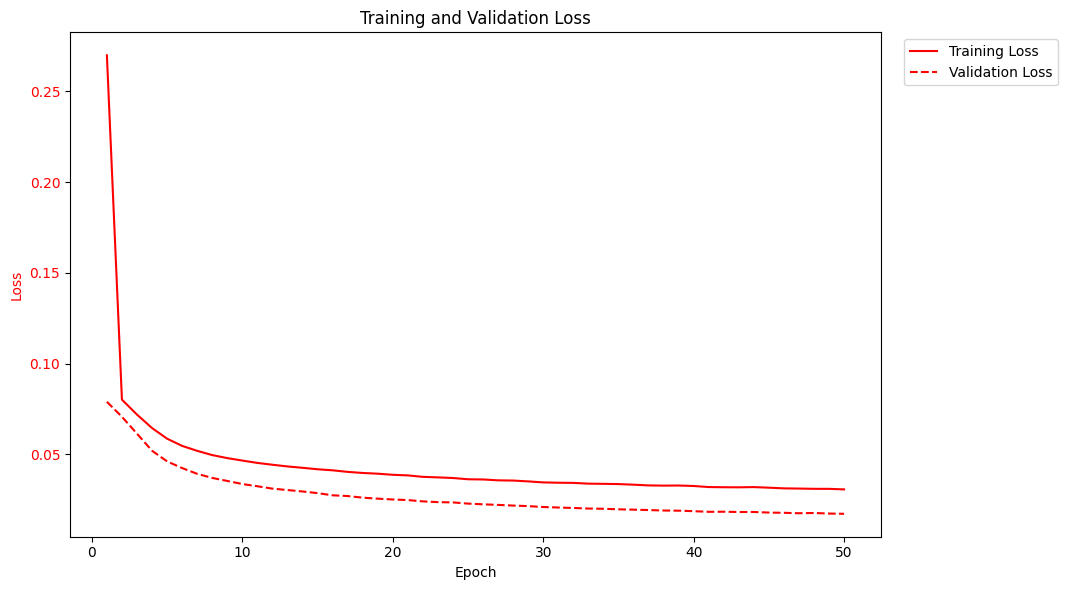

In [13]:
# Visualisasi Loss
plt.figure(figsize=(12, 6))

# Plotting loss
color = 'red'
plt.xlabel('Epoch')
plt.ylabel('Loss', color=color)
plt.plot(epochs, train_loss, label='Training Loss', color=color)
plt.plot(epochs, val_loss, label='Validation Loss', color=color, linestyle='--')
plt.tick_params(axis='y', labelcolor=color)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

plt.title('Training and Validation Loss')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

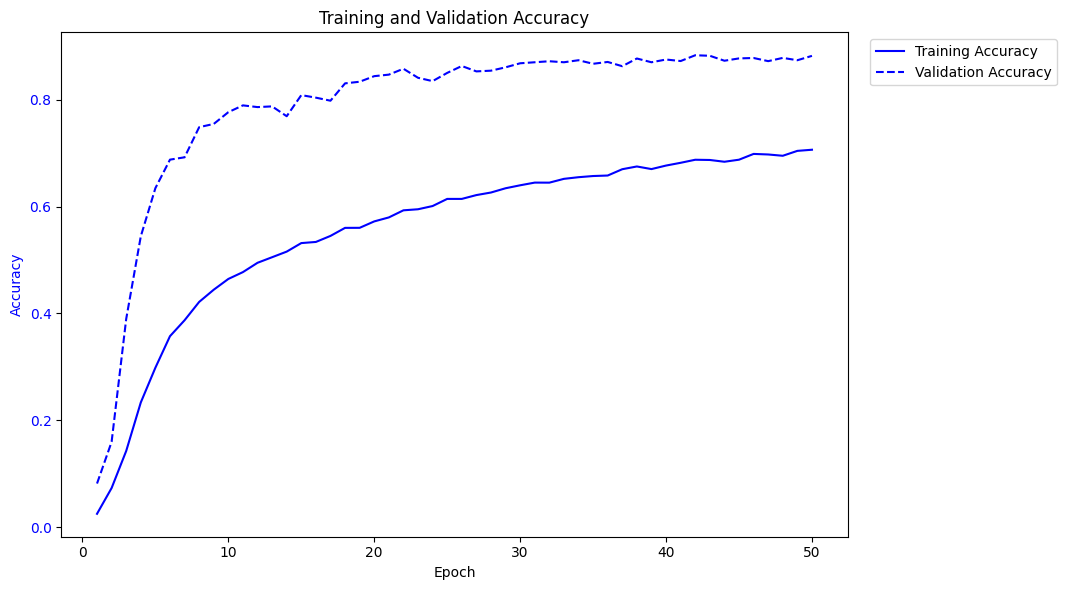

In [14]:
# Visualisasi Accuracy
plt.figure(figsize=(12, 6))

# Plotting accuracy
color = 'blue'
plt.xlabel('Epoch')
plt.ylabel('Accuracy', color=color)
plt.plot(epochs, train_accuracy, label='Training Accuracy', color=color)
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color=color, linestyle='--')
plt.tick_params(axis='y', labelcolor=color)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

plt.title('Training and Validation Accuracy')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

In [15]:
# Prediksi
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.35).astype(int)

206/206 [==============================] - 0s 2ms/step


In [16]:
from sklearn.metrics import hamming_loss, jaccard_score
# Evaluasi menggunakan Hamming Loss dan Jaccard Similarity Score
print("Hamming Loss:", hamming_loss(y_test, y_pred_binary))
print("Jaccard Similarity Score:", jaccard_score(y_test, y_pred_binary, average='samples'))

Hamming Loss: 0.0040360469825840425
Jaccard Similarity Score: 0.8684310449574727


In [17]:
# # Mencetak beberapa contoh prediksi dan label asli
# for i in range(10):  # Mencetak 10 contoh pertama
#     print(f"Predicted: {y_pred_binary[i]}, Actual: {y_test[i]}")

In [18]:
# # Mencetak beberapa contoh prediksi dan label asli
# for i in range(100):  # Mencetak 10 contoh pertama
#     predicted_idx = np.where(y_pred_binary[i] == 1)[0]
#     actual_idx = np.where(y_test[i] == 1)[0]
#     print(f"Predicted: {predicted_idx}, Actual: {actual_idx}")

In [19]:
# Mencetak contoh prediksi dan label asli yang memiliki lebih dari 2 prediksi benar
for i in range(len(y_test)):
    predicted_idx = np.where(y_pred_binary[i] == 1)[0]
    actual_idx = np.where(y_test[i] == 1)[0]
    if len(predicted_idx) > 2:
        print(f"Sample {i}:")
        print(f"Predicted: {predicted_idx}")
        print(f"Actual: {actual_idx}\n")

Sample 103:
Predicted: [26 46 54]
Actual: [32 46 67]

Sample 222:
Predicted: [45 60 66]
Actual: [45 60]

Sample 423:
Predicted: [34 63 65]
Actual: [ 1 34 63]

Sample 811:
Predicted: [34 63 65]
Actual: [26 63 65]

Sample 902:
Predicted: [45 60 66]
Actual: [45 60]

Sample 922:
Predicted: [34 63 65]
Actual: [34 63 65]

Sample 1419:
Predicted: [34 63 65]
Actual: [34 63 65]

Sample 1588:
Predicted: [26 46 54]
Actual: [32 46 67]

Sample 1634:
Predicted: [26 32 46]
Actual: [32 46]

Sample 1804:
Predicted: [34 63 65]
Actual: [ 1 34 63]

Sample 2018:
Predicted: [34 63 65]
Actual: [34 63 65]

Sample 2288:
Predicted: [34 63 65]
Actual: [63 65]

Sample 2378:
Predicted: [34 63 65]
Actual: [63 65]

Sample 2483:
Predicted: [34 63 65]
Actual: [34 63 65]

Sample 2663:
Predicted: [34 63 65]
Actual: [63 65]

Sample 2693:
Predicted: [25 73 74]
Actual: [25]

Sample 2798:
Predicted: [34 63 65]
Actual: [63 65]

Sample 2998:
Predicted: [34 63 65]
Actual: [63 65]

Sample 3176:
Predicted: [34 63 65]
Actual: [63

In [20]:
# Konversi prediksi menjadi biner berdasarkan tiga probabilitas terbesar
y_pred_binary = np.zeros_like(y_pred)
for i in range(len(y_pred)):
    top3_indices = np.argsort(y_pred[i])[-3:]  # Dapatkan indeks dari 3 probabilitas terbesar
    y_pred_binary[i, top3_indices] = 1

# Mencetak contoh prediksi
for i in range(len(y_test)):
    predicted_idx = np.where(y_pred_binary[i] == 1)[0]
    actual_idx = np.where(y_test[i] == 1)[0]
    if len(predicted_idx) >= 2:
        print(f"Sample {i}:")
        print(f"Predicted: {predicted_idx}")
        print(f"Actual: {actual_idx}\n")

Sample 0:
Predicted: [ 9 63 65]
Actual: [ 9 40]

Sample 1:
Predicted: [24 69 72]
Actual: [69]

Sample 2:
Predicted: [18 27 28]
Actual: [28]

Sample 3:
Predicted: [11 13 16]
Actual: [16]

Sample 4:
Predicted: [50 52 58]
Actual: [58]

Sample 5:
Predicted: [34 65 66]
Actual: [26 34 65]

Sample 6:
Predicted: [18 27 28]
Actual: [28]

Sample 7:
Predicted: [ 5 29 43]
Actual: [29]

Sample 8:
Predicted: [47 48 55]
Actual: [48]

Sample 9:
Predicted: [ 7 23 41]
Actual: [41]

Sample 10:
Predicted: [25 39 47]
Actual: [39]

Sample 11:
Predicted: [20 54 58]
Actual: [20 58]

Sample 12:
Predicted: [26 34 65]
Actual: [34]

Sample 13:
Predicted: [ 3 14 62]
Actual: [62]

Sample 14:
Predicted: [12 30 67]
Actual: [12]

Sample 15:
Predicted: [34 65 66]
Actual: [65]

Sample 16:
Predicted: [47 48 55]
Actual: [48]

Sample 17:
Predicted: [25 73 74]
Actual: [25]

Sample 18:
Predicted: [20 29 54]
Actual: [20 31]

Sample 19:
Predicted: [10 11 57]
Actual: [10]

Sample 20:
Predicted: [ 7 23 41]
Actual: [41]

Sample 2

### Model Hidden Layer

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Input layer
input_layer = Input(shape=(X_train.shape[1],))

# Hidden layers
hidden_layer_1 = Dense(256, activation='relu')(input_layer)
hidden_layer_1 = BatchNormalization()(hidden_layer_1)
hidden_layer_1 = Dropout(0.5)(hidden_layer_1)

hidden_layer_2 = Dense(128, activation='relu')(hidden_layer_1)
hidden_layer_2 = BatchNormalization()(hidden_layer_2)
hidden_layer_2 = Dropout(0.4)(hidden_layer_2)

hidden_layer_3 = Dense(64, activation='relu')(hidden_layer_2)
hidden_layer_3 = BatchNormalization()(hidden_layer_3)
hidden_layer_3 = Dropout(0.3)(hidden_layer_3)

hidden_layer_4 = Dense(32, activation='relu')(hidden_layer_3)
hidden_layer_4 = BatchNormalization()(hidden_layer_4)
hidden_layer_4 = Dropout(0.2)(hidden_layer_4)

# Output layer
output_layer = Dense(y_train.shape[1], activation='sigmoid')(hidden_layer_4)

# Model
model2 = Model(inputs=input_layer, outputs=output_layer)

# Mengompilasi model dengan learning rate yang disesuaikan
optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callback untuk early stopping dan learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Melatih model
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
659/659 [==============================] - 6s 8ms/step - loss: 0.2663 - accuracy: 0.0298 - val_loss: 0.0772 - val_accuracy: 0.0936 - lr: 0.0010
Epoch 2/50
659/659 [==============================] - 5s 8ms/step - loss: 0.0780 - accuracy: 0.0825 - val_loss: 0.0674 - val_accuracy: 0.2111 - lr: 0.0010
Epoch 3/50
659/659 [==============================] - 5s 8ms/step - loss: 0.0698 - accuracy: 0.1500 - val_loss: 0.0589 - val_accuracy: 0.3826 - lr: 0.0010
Epoch 4/50
659/659 [==============================] - 5s 8ms/step - loss: 0.0631 - accuracy: 0.2280 - val_loss: 0.0516 - val_accuracy: 0.5422 - lr: 0.0010
Epoch 5/50
659/659 [==============================] - 5s 8ms/step - loss: 0.0579 - accuracy: 0.2944 - val_loss: 0.0459 - val_accuracy: 0.6450 - lr: 0.0010
Epoch 6/50
659/659 [==============================] - 5s 8ms/step - loss: 0.0540 - accuracy: 0.3521 - val_loss: 0.0419 - val_accuracy: 0.6879 - lr: 0.0010
Epoch 7/50
659/659 [==============================] - 5s 8ms/step - lo

In [22]:
# Mengambil metrik evaluasi
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

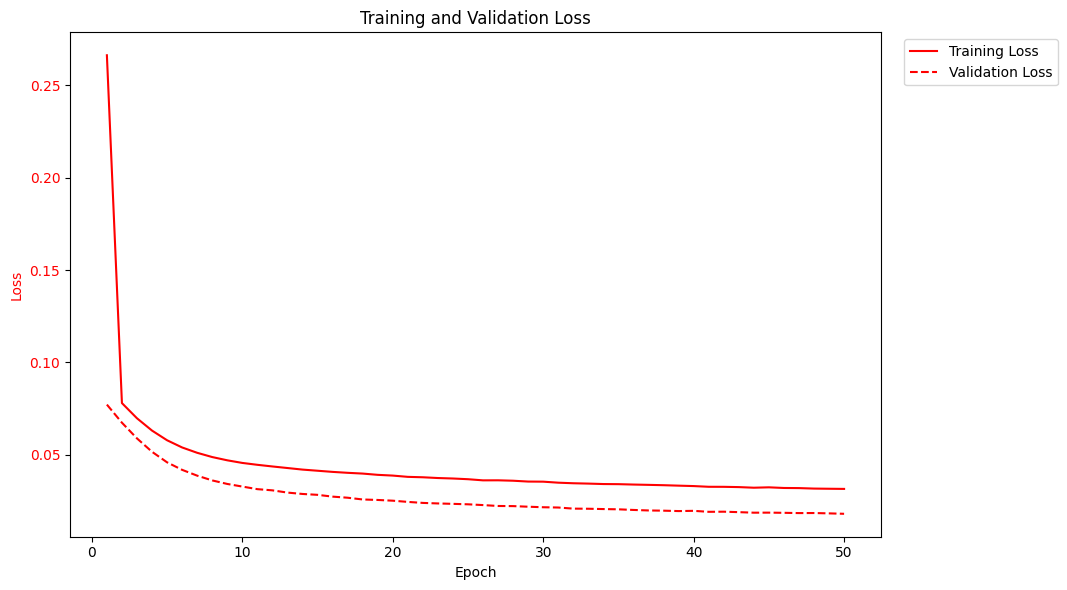

In [23]:
# Visualisasi Loss
plt.figure(figsize=(12, 6))

# Plotting loss
color = 'red'
plt.xlabel('Epoch')
plt.ylabel('Loss', color=color)
plt.plot(epochs, train_loss, label='Training Loss', color=color)
plt.plot(epochs, val_loss, label='Validation Loss', color=color, linestyle='--')
plt.tick_params(axis='y', labelcolor=color)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

plt.title('Training and Validation Loss')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

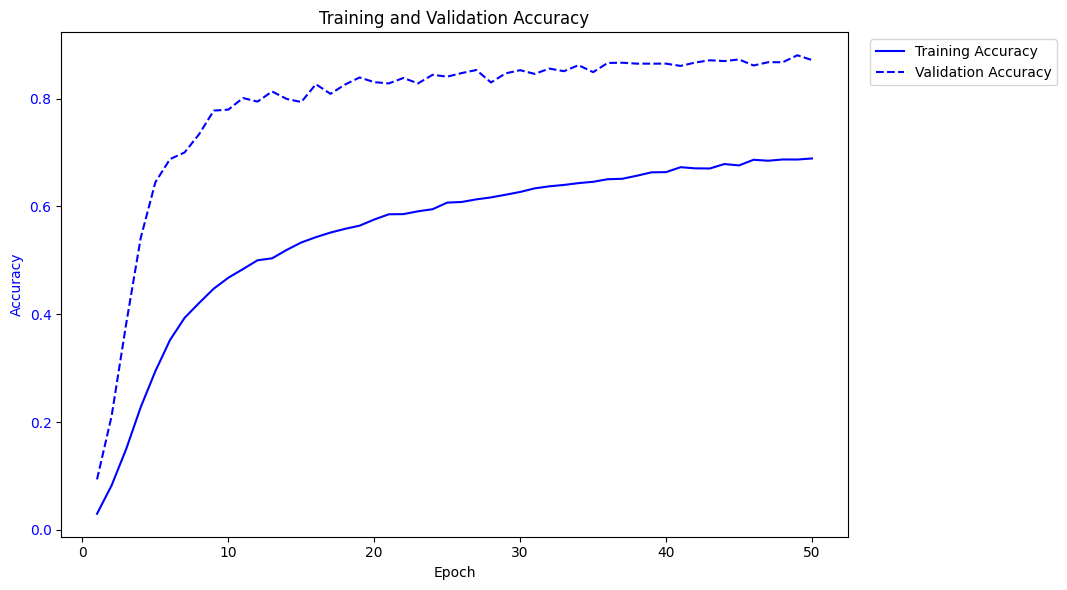

In [24]:
# Visualisasi Accuracy
plt.figure(figsize=(12, 6))

# Plotting accuracy
color = 'blue'
plt.xlabel('Epoch')
plt.ylabel('Accuracy', color=color)
plt.plot(epochs, train_accuracy, label='Training Accuracy', color=color)
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color=color, linestyle='--')
plt.tick_params(axis='y', labelcolor=color)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

plt.title('Training and Validation Accuracy')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

In [25]:
# Prediksi
y_pred2 = model2.predict(X_test)
y_pred_binary2 = (y_pred2 >= 0.35).astype(int)

206/206 [==============================] - 0s 2ms/step


In [26]:
from sklearn.metrics import hamming_loss, jaccard_score
# Evaluasi menggunakan Hamming Loss dan Jaccard Similarity Score
print("Hamming Loss:", hamming_loss(y_test, y_pred_binary2))
print("Jaccard Similarity Score:", jaccard_score(y_test, y_pred_binary2, average='samples'))

Hamming Loss: 0.004552450384771162


Jaccard Similarity Score: 0.846663628999595


In [27]:
# # Mencetak beberapa contoh prediksi dan label asli
# for i in range(10):  # Mencetak 10 contoh pertama
#     print(f"Predicted: {y_pred_binary[i]}, Actual: {y_test[i]}")

In [28]:
# # Mencetak beberapa contoh prediksi dan label asli
# for i in range(100):  # Mencetak 10 contoh pertama
#     predicted_idx = np.where(y_pred_binary[i] == 1)[0]
#     actual_idx = np.where(y_test[i] == 1)[0]
#     print(f"Predicted: {predicted_idx}, Actual: {actual_idx}")

In [29]:
# Mencetak contoh prediksi dan label asli yang memiliki lebih dari 2 prediksi benar
for i in range(len(y_test)):
    predicted_idx = np.where(y_pred_binary2[i] == 1)[0]
    actual_idx = np.where(y_test[i] == 1)[0]
    if len(predicted_idx) >= 2:
        print(f"Sample {i}:")
        print(f"Predicted: {predicted_idx}")
        print(f"Actual: {actual_idx}\n")

Sample 103:
Predicted: [26 32 46]
Actual: [32 46 67]

Sample 1143:
Predicted: [26 32 46]
Actual: [32 46 74]

Sample 1588:
Predicted: [26 32 46]
Actual: [32 46 67]

Sample 2341:
Predicted: [26 32 46]
Actual: [32 46 67]

Sample 2538:
Predicted: [26 32 46]
Actual: [32 46 54]

Sample 3176:
Predicted: [34 63 65]
Actual: [63 65]

Sample 3890:
Predicted: [26 32 46]
Actual: [32 46 54]

Sample 3942:
Predicted: [26 32 46]
Actual: [32 46 54]

Sample 4517:
Predicted: [34 63 65]
Actual: [31 65 68]

Sample 4751:
Predicted: [34 63 65]
Actual: [34 63 65]

Sample 5216:
Predicted: [26 32 61]
Actual: [32 46 67]

Sample 5350:
Predicted: [26 32 46]
Actual: [32 46 54]

Sample 5907:
Predicted: [34 63 65]
Actual: [34 63 65]



In [41]:
# Konversi prediksi menjadi biner berdasarkan tiga probabilitas terbesar
y_pred_binary2 = np.zeros_like(y_pred2)
for i in range(len(y_pred2)):
    top3_indices = np.argsort(y_pred2[i])[-3:]  # Dapatkan indeks dari 3 probabilitas terbesar
    y_pred_binary2[i, top3_indices] = 1

# Mencetak contoh prediksi dan label asli lebih dari 2
for i in range(len(y_test)):
    predicted_idx = np.where(y_pred_binary2[i] == 1)[0]
    actual_idx = np.where(y_test[i] == 1)[0]
    if len(predicted_idx) >= 2:
        print(f"Sample {i}:")
        print(f"Predicted: {predicted_idx}")
        print(f"Actual: {actual_idx}\n")

Sample 0:
Predicted: [ 1  9 65]
Actual: [ 9 40]

Sample 1:
Predicted: [22 24 69]
Actual: [69]

Sample 2:
Predicted: [18 27 28]
Actual: [28]

Sample 3:
Predicted: [11 16 52]
Actual: [16]

Sample 4:
Predicted: [50 56 58]
Actual: [58]

Sample 5:
Predicted: [34 37 65]
Actual: [26 34 65]

Sample 6:
Predicted: [18 27 28]
Actual: [28]

Sample 7:
Predicted: [ 5 29 43]
Actual: [29]

Sample 8:
Predicted: [47 48 55]
Actual: [48]

Sample 9:
Predicted: [ 7 41 63]
Actual: [41]

Sample 10:
Predicted: [39 47 71]
Actual: [39]

Sample 11:
Predicted: [20 29 58]
Actual: [20 58]

Sample 12:
Predicted: [26 34 65]
Actual: [34]

Sample 13:
Predicted: [ 3 62 70]
Actual: [62]

Sample 14:
Predicted: [12 30 67]
Actual: [12]

Sample 15:
Predicted: [34 63 65]
Actual: [65]

Sample 16:
Predicted: [47 48 55]
Actual: [48]

Sample 17:
Predicted: [25 55 73]
Actual: [25]

Sample 18:
Predicted: [20 29 58]
Actual: [20 31]

Sample 19:
Predicted: [ 7 10 57]
Actual: [10]

Sample 20:
Predicted: [ 7 41 63]
Actual: [41]

Sample 2

### Kfold

In [31]:
# # Mengubah DataFrame menjadi array numpy
# y2 = y.to_numpy()

# y2.astype(int)

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Fungsi untuk membuat model
def create_model(input_dim, num_labels):
    model3 = Sequential()
    model3.add(Dense(256, activation='relu', input_shape=(input_dim,)))
    model3.add(BatchNormalization())
    model3.add(Dropout(0.5))
    model3.add(Dense(128, activation='relu'))
    model3.add(BatchNormalization())
    model3.add(Dropout(0.4))
    model3.add(Dense(64, activation='relu'))
    model3.add(BatchNormalization())
    model3.add(Dropout(0.3))
    model3.add(Dense(32, activation='relu'))
    model3.add(BatchNormalization())
    model3.add(Dropout(0.2))
    model3.add(Dense(num_labels, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.001)
    model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model3

# KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

train_accuracies = []
train_f1_scores = []
val_accuracies = []
val_f1_scores = []
histories = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    
    model3 = create_model(input_dim=X_train.shape[1], num_labels=y_train.shape[1])
    
    # Callback untuk early stopping dan learning rate scheduler
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
    
    # Latih model
    history3 = model3.fit(X_fold_train, y_fold_train, epochs=50, batch_size=32, validation_data=(X_fold_val, y_fold_val), 
                          callbacks=[early_stopping, reduce_lr], verbose=0)
    
    # Simpan history setiap fold
    histories.append(history3)
    
    # Evaluasi model pada set pelatihan
    y_train_pred = (model3.predict(X_fold_train) > 0.35).astype(int)
    
    train_acc = accuracy_score(y_fold_train, y_train_pred)
    train_f1 = f1_score(y_fold_train, y_train_pred, average='micro')
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    
    # Evaluasi model pada set validasi
    y_val_pred = (model3.predict(X_fold_val) > 0.35).astype(int)
    
    val_acc = accuracy_score(y_fold_val, y_val_pred)
    val_f1 = f1_score(y_fold_val, y_val_pred, average='micro')
    
    val_accuracies.append(val_acc)
    val_f1_scores.append(val_f1)
    
    print(f"Fold train accuracy: {train_acc}, Fold train F1 score: {train_f1}")
    print(f"Fold val accuracy: {val_acc}, Fold val F1 score: {val_f1}")

# Rata-rata hasil cross-validation untuk set pelatihan dan validasi
print(f"Average train accuracy: {np.mean(train_accuracies)}")
print(f"Average train F1 score: {np.mean(train_f1_scores)}")
print(f"Average val accuracy: {np.mean(val_accuracies)}")
print(f"Average val F1 score: {np.mean(val_f1_scores)}")

83/83 [==============================] - 0s 2ms/step
Fold train accuracy: 0.8309704641350211, Fold train F1 score: 0.874029466348521
Fold val accuracy: 0.8192862566438877, Fold val F1 score: 0.8640627665017909
83/83 [==============================] - 0s 2ms/step
Fold train accuracy: 0.8222784810126582, Fold train F1 score: 0.8689567191340075
Fold val accuracy: 0.8261199696279423, Fold val F1 score: 0.8702445652173914
83/83 [==============================] - 0s 2ms/step
Fold train accuracy: 0.8233333333333334, Fold train F1 score: 0.869632714880727
Fold val accuracy: 0.813591495823842, Fold val F1 score: 0.8597530028759939
83/83 [==============================] - 0s 2ms/step
Fold train accuracy: 0.8268354430379747, Fold train F1 score: 0.8735666697945013
Fold val accuracy: 0.8189066059225513, Fold val F1 score: 0.8663065496286293
83/83 [==============================] - 0s 1ms/step
Fold train accuracy: 0.8333403653854268, Fold train F1 score: 0.8789344868803005
Fold val accuracy: 0.8203

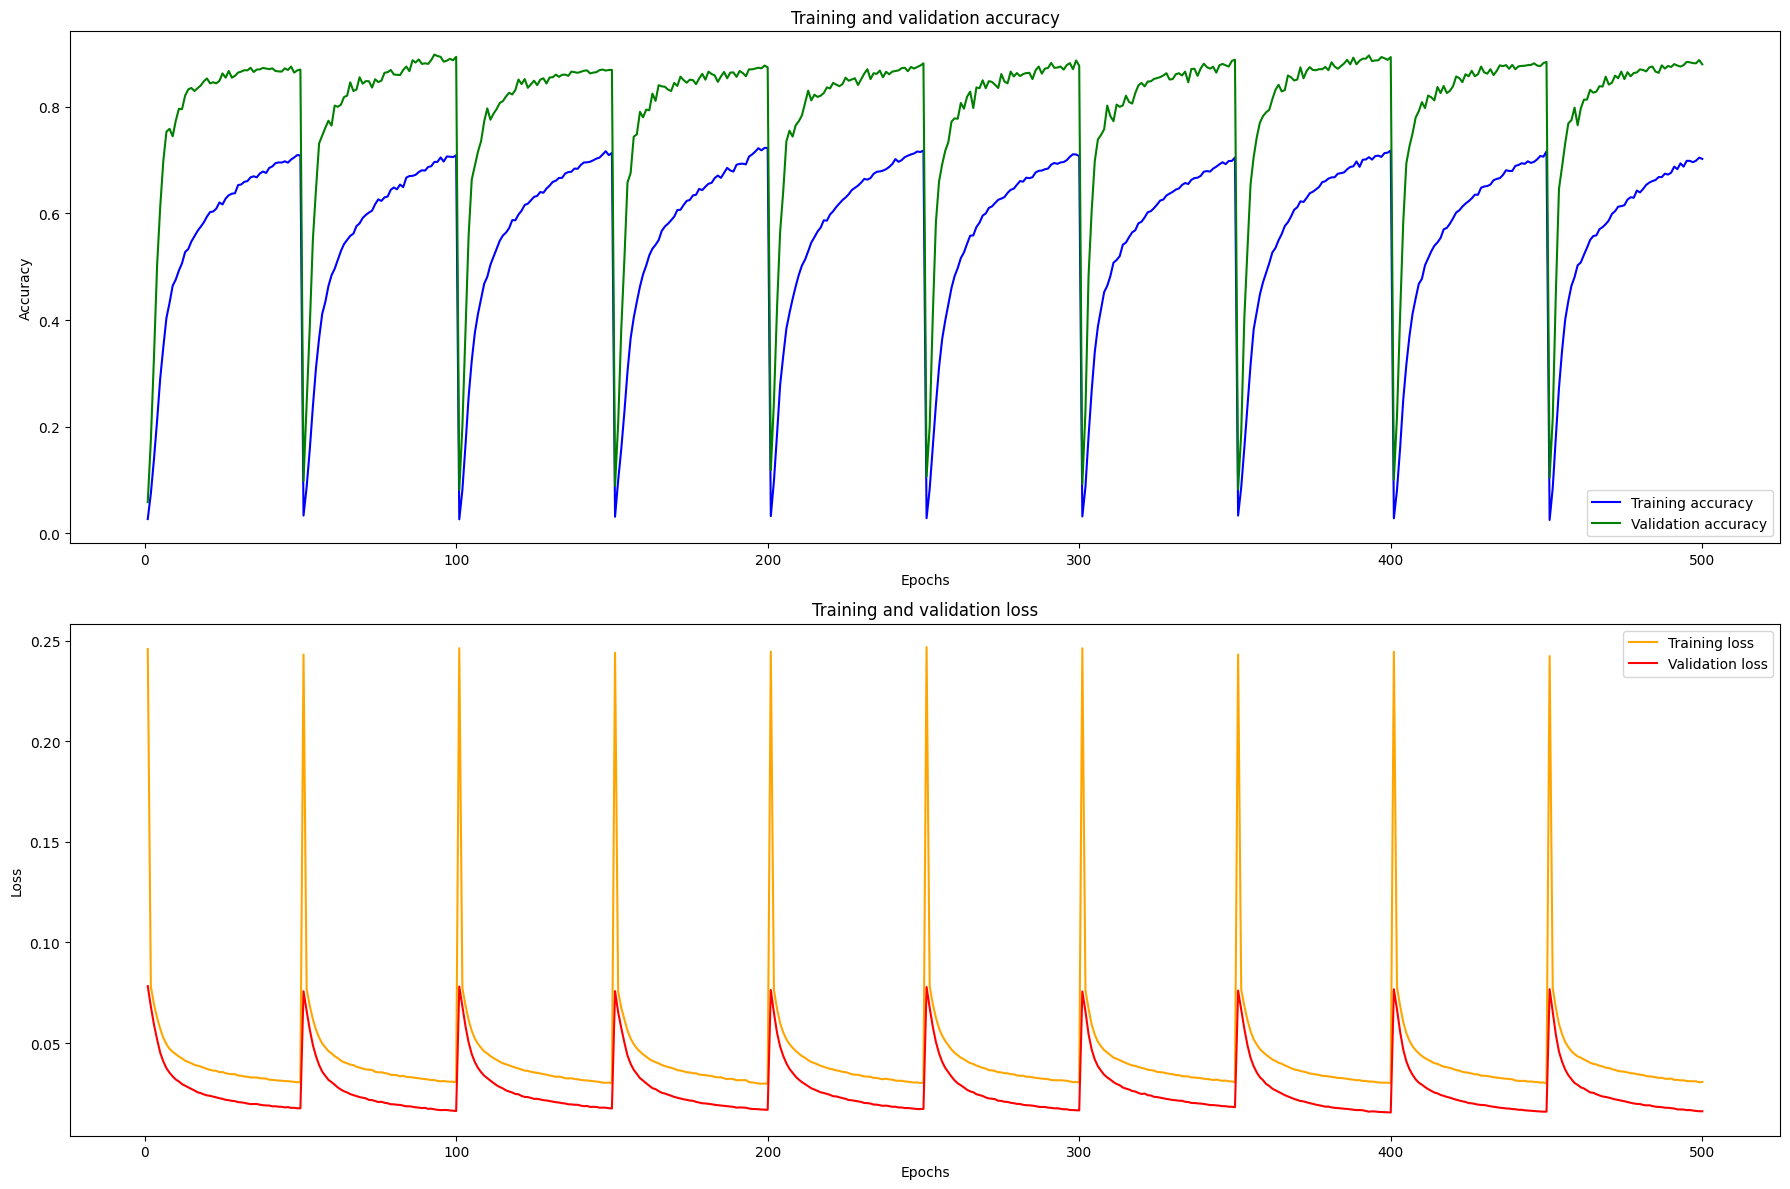

In [33]:
# Fungsi untuk plot learning curve
def plot_learning_curve(histories):
    acc = []
    val_acc = []
    loss = []
    val_loss = []

    for history3 in histories:
        acc.extend(history3.history['accuracy'])
        val_acc.extend(history3.history['val_accuracy'])
        loss.extend(history3.history['loss'])
        val_loss.extend(history3.history['val_loss'])

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(18, 12))

    # Plot akurasi
    plt.subplot(2, 1, 1)
    plt.plot(epochs, acc, label='Training accuracy', color='blue')
    plt.plot(epochs, val_acc, label='Validation accuracy', color='green')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(2, 1, 2)
    plt.plot(epochs, loss, label='Training loss', color='orange')
    plt.plot(epochs, val_loss, label='Validation loss', color='red')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot learning curve
plot_learning_curve(histories)

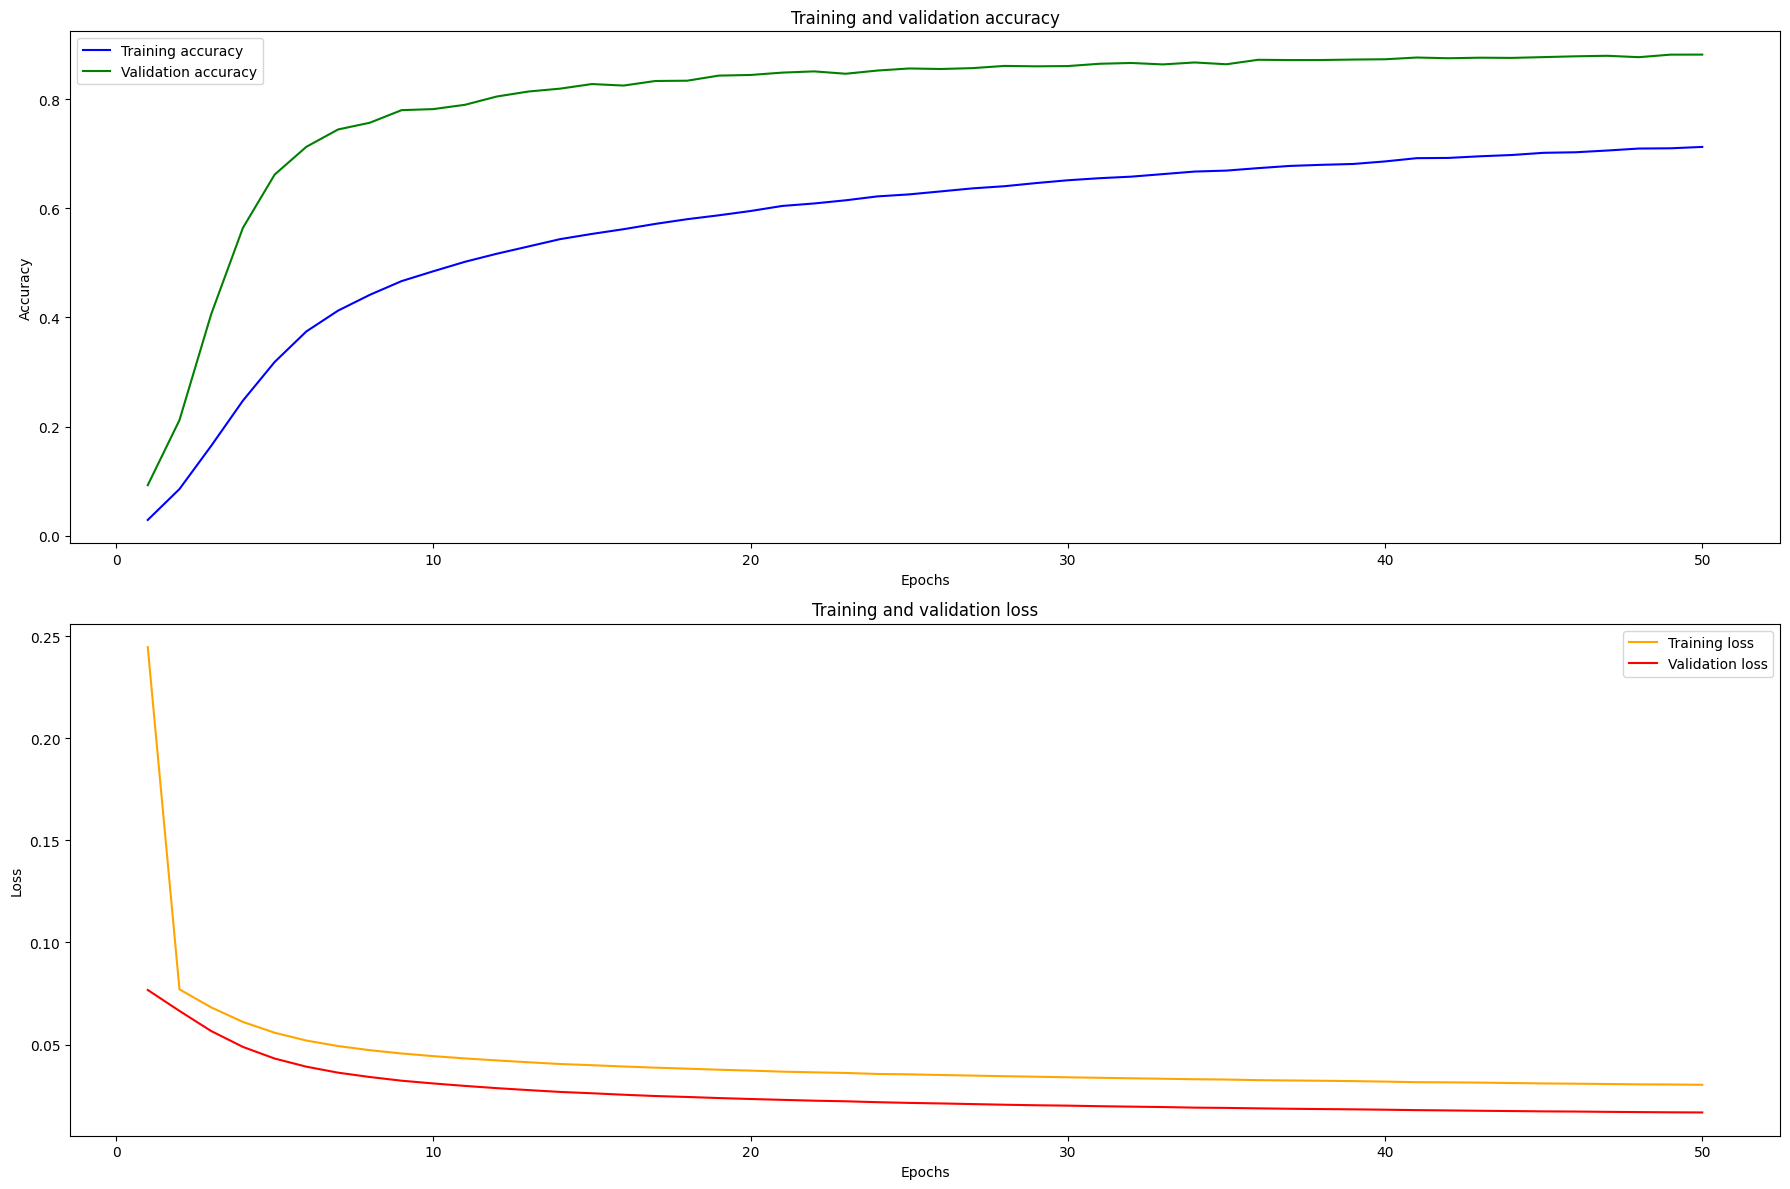

In [34]:
# Fungsi untuk plot learning curve
def plot_learning_curve(histories, num_epochs):
    avg_acc = np.zeros(num_epochs)
    avg_val_acc = np.zeros(num_epochs)
    avg_loss = np.zeros(num_epochs)
    avg_val_loss = np.zeros(num_epochs)

    for history3 in histories:
        avg_acc += np.array(history3.history['accuracy'])
        avg_val_acc += np.array(history3.history['val_accuracy'])
        avg_loss += np.array(history3.history['loss'])
        avg_val_loss += np.array(history3.history['val_loss'])

    avg_acc /= len(histories)
    avg_val_acc /= len(histories)
    avg_loss /= len(histories)
    avg_val_loss /= len(histories)

    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(18, 12))

    # Plot akurasi
    plt.subplot(2, 1, 1)
    plt.plot(epochs, avg_acc, label='Training accuracy', color='blue')
    plt.plot(epochs, avg_val_acc, label='Validation accuracy', color='green')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(2, 1, 2)
    plt.plot(epochs, avg_loss, label='Training loss', color='orange')
    plt.plot(epochs, avg_val_loss, label='Validation loss', color='red')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Tentukan jumlah epoch dari history model
num_epochs = 50

# Plot learning curve
plot_learning_curve(histories, num_epochs)

In [35]:
# Prediksi
y_pred3 = model3.predict(X_test)
y_pred_binary3 = (y_pred3 >= 0.35).astype(int)

206/206 [==============================] - 0s 2ms/step


In [36]:
from sklearn.metrics import hamming_loss, jaccard_score
# Evaluasi menggunakan Hamming Loss dan Jaccard Similarity Score
print("Hamming Loss:", hamming_loss(y_test, y_pred_binary3))
print("Jaccard Similarity Score:", jaccard_score(y_test, y_pred_binary3, average='samples'))

Hamming Loss: 0.004070473876063184
Jaccard Similarity Score: 0.8737064601053058


In [37]:
y_pred

array([[5.96176907e-02, 1.55747533e-01, 2.52989568e-02, ...,
        1.25480993e-02, 1.15274275e-02, 1.86060239e-02],
       [2.15118453e-05, 2.52756593e-09, 4.47496984e-10, ...,
        7.82903358e-02, 3.57279158e-03, 1.30630448e-03],
       [1.56285944e-06, 5.55706698e-08, 6.25089580e-09, ...,
        5.64540084e-03, 3.80525962e-05, 1.23262274e-04],
       ...,
       [5.80298854e-03, 8.06419924e-03, 2.92710629e-05, ...,
        2.55486127e-02, 8.71625263e-03, 8.30939505e-03],
       [2.22489398e-05, 2.33300623e-09, 4.42185621e-10, ...,
        7.54011273e-02, 3.75186536e-03, 1.34653738e-03],
       [1.75190135e-03, 5.98826911e-04, 1.11863255e-06, ...,
        2.67687589e-02, 5.40596899e-03, 1.52674206e-02]], dtype=float32)

In [38]:
y_pred_binary

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
# Mencetak contoh prediksi dan label asli yang memiliki lebih dari 2 prediksi benar
for i in range(len(y_test)):
    predicted_idx = np.where(y_pred_binary3[i] == 1)[0]
    actual_idx = np.where(y_test[i] == 1)[0]
    if len(predicted_idx) > 2:
        print(f"Sample {i}:")
        print(f"Predicted: {predicted_idx}")
        print(f"Actual: {actual_idx}\n")

Sample 103:
Predicted: [32 46 54]
Actual: [32 46 67]

Sample 476:
Predicted: [26 32 46]
Actual: [ 7 26]

Sample 1011:
Predicted: [37 63 65]
Actual: [37]

Sample 1143:
Predicted: [32 46 54]
Actual: [32 46 74]

Sample 1420:
Predicted: [37 63 65]
Actual: [21 37]

Sample 1588:
Predicted: [32 46 54]
Actual: [32 46 67]

Sample 1634:
Predicted: [26 32 46 54]
Actual: [32 46]

Sample 2341:
Predicted: [32 46 54]
Actual: [32 46 67]

Sample 2513:
Predicted: [26 32 46]
Actual: [ 7 26]

Sample 2538:
Predicted: [32 46 54]
Actual: [32 46 54]

Sample 3051:
Predicted: [11 26 38]
Actual: [ 0 11 26]

Sample 3890:
Predicted: [26 32 46 54]
Actual: [32 46 54]

Sample 3942:
Predicted: [32 46 54]
Actual: [32 46 54]

Sample 3958:
Predicted: [26 32 46 54]
Actual: [32 46 54]

Sample 4678:
Predicted: [11 26 38]
Actual: [ 0 11 26]

Sample 5274:
Predicted: [32 46 54]
Actual: [60 61]

Sample 5350:
Predicted: [32 46 54]
Actual: [32 46 54]



In [40]:
# Konversi prediksi menjadi biner berdasarkan tiga probabilitas terbesar
y_pred_binary3 = np.zeros_like(y_pred3)
for i in range(len(y_pred3)):
    top3_indices = np.argsort(y_pred3[i])[-3:]  # Dapatkan indeks dari 3 probabilitas terbesar
    y_pred_binary3[i, top3_indices] = 1

# Mencetak contoh prediksi dan label asli yang memiliki lebih dari 2 prediksi benar
for i in range(len(y_test)):
    predicted_idx = np.where(y_pred_binary3[i] == 1)[0]
    actual_idx = np.where(y_test[i] == 1)[0]
    if len(predicted_idx) > 2:
        print(f"Sample {i}:")
        print(f"Predicted: {predicted_idx}")
        print(f"Actual: {actual_idx}\n")

Sample 0:
Predicted: [ 1 63 65]
Actual: [ 9 40]

Sample 1:
Predicted: [22 69 72]
Actual: [69]

Sample 2:
Predicted: [18 27 28]
Actual: [28]

Sample 3:
Predicted: [11 16 52]
Actual: [16]

Sample 4:
Predicted: [50 52 58]
Actual: [58]

Sample 5:
Predicted: [34 37 65]
Actual: [26 34 65]

Sample 6:
Predicted: [18 27 28]
Actual: [28]

Sample 7:
Predicted: [ 5 29 43]
Actual: [29]

Sample 8:
Predicted: [35 47 48]
Actual: [48]

Sample 9:
Predicted: [23 41 63]
Actual: [41]

Sample 10:
Predicted: [39 47 59]
Actual: [39]

Sample 11:
Predicted: [ 3 20 58]
Actual: [20 58]

Sample 12:
Predicted: [26 34 66]
Actual: [34]

Sample 13:
Predicted: [ 3 19 62]
Actual: [62]

Sample 14:
Predicted: [12 30 67]
Actual: [12]

Sample 15:
Predicted: [34 65 66]
Actual: [65]

Sample 16:
Predicted: [35 47 48]
Actual: [48]

Sample 17:
Predicted: [25 49 74]
Actual: [25]

Sample 18:
Predicted: [ 3 20 58]
Actual: [20 31]

Sample 19:
Predicted: [ 0 10 57]
Actual: [10]

Sample 20:
Predicted: [23 41 63]
Actual: [41]

Sample 2